# Исследование продаж компьютерных игр интернет-магазине «Стримчик».


# Описание проекта 
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных:
-  Name — название игры
-  Platform — платформа
-  Year_of_Release — год выпуска
-  Genre — жанр игры
-  NA_sales — продажи в Северной Америке (миллионы проданных копий)
-  EU_sales — продажи в Европе (миллионы проданных копий)
-  JP_sales — продажи в Японии (миллионы проданных копий)
-  Other_sales — продажи в других странах (миллионы проданных копий)
-  Critic_Score — оценка критиков (максимум 100)
-  User_Score — оценка пользователей (максимум 10)
-  Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## 1. Выгрузим данные и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import numpy as np
import seaborn as sns


In [2]:
df= pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## 2. Подготовка данных.

**Приведем данные к нижнему регистру**

In [5]:
df.columns=df.columns.str.lower()

**Проверим данные на неявные дубликаты**

In [6]:
df['name'].unique()


array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [7]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
df['year_of_release'].unique()



array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
df['na_sales'].unique()


array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

In [11]:
df['eu_sales'].unique()

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

In [12]:
df['jp_sales'].unique()

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

In [13]:
df['other_sales'].unique()

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

In [14]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [15]:
df['user_score'].unique()
df['user_score']=df['user_score'].replace('tbd', np.NaN)
df['user_score']=df['user_score'].astype('float')
df['user_score'].unique()



array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

**Комментарий.** Просмотрели данные здесь подходит тип float(числовой), поэтому заменили "tbt" на nan и изменили тип данных.

In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
df['rating']=df['rating'].replace('K-A', 'E10+')
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

**Коментарий.** Заменили К-А на E10+, так как это одинаковые рейтинги(для одной категориии).

**Проверим данные на наличие пропусков**

In [18]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

**Коментарий.** Мы видим, что в данных присутствуют пропуски следующих столбцах: year_of_release(269), critic_score(8578), user_score(9125), rating(6766).

**Расчитаем процент пропусков**

In [19]:
percentage_of_skips=(df.isna().sum()/len(df))*100
value_df = pd.DataFrame({'column_name': df.columns,
                                'percentage_of_skips':percentage_of_skips})
value_df.sort_values(by='percentage_of_skips').round(2)

,column_name,percentage_of_skips
platform,platform,0.00
na_sales,na_sales,0.00
eu_sales,eu_sales,0.00
jp_sales,jp_sales,0.00
other_sales,other_sales,0.00
name,name,0.01
genre,genre,0.01
year_of_release,year_of_release,1.61
rating,rating,40.48
critic_score,critic_score,51.32


**Удалим пропуски**

In [20]:
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)

** Изменим тип данных**

In [21]:
df['year_of_release'].unique()
df['year_of_release']=df['year_of_release'].astype('int')


**Комментарий.** Проанализировав процент данных от общей численности данных. Решаем удалить столбцы, где проценты пропусков минимальны.
Столбец **name** отвечает за название компьютерной игры. По данной ячейке мы не можем рассчитать среднее значение или медиану. Оставить его пустым тоже нельзя, т.к. непонятно о какой видеоигре идет речь, поэтому принимаем решение удалить эти 2 строки,так как они повлияют на нашу статистику. На счет появления пропуска в данном столбце можно сказать, что или его забыли указать при внесенни данных, или у игры не было утверждено официальное название и поэтому ячейка оказалась пуста.
Пропуск в  столбце **year_of_release** мог возникнуть из-за того, что при заполнении данных об игре забыли указать дату или точная дата выхода игры точно не определена.
Пропуск в стобце **genre** мог возникнуть при заполнении или не смогли отнести игру к определенному ввиду жанра.

**Заполним пропуски в столбце rating**

In [5]:
df['rating']=df['rating'].fillna('неопределен')
df['rating'].unique()


NameError: name 'df' is not defined

**Комментарий.** Так как в данном столбце значимое количесво пропусков в процентном соотношении, удаление данного столбца сильно повлияет на статистику исследования, поэтому мною решено было заменить пропуски на "неопределен".Проруски в данном столбце могли возникнуть в следсвии внесения данных.

**Установим маркер**

In [23]:
df.loc[df['critic_score'].isna(),'critic_score']=-10
df.loc[df['user_score'].isna(),'user_score']=-10
df['critic_score']=df['critic_score'].astype('int')



**Комментарий.** В связи с большим количесвом пропусков мы также не можем удалить данные пропуски, так как это очень сильно повлияет на статистику исследования, поэтому заменим пропуски маркером=-10. 
Пропуски в данных столбцах могли возникнуть при внесении данных или же игры просто неоцененны пользоватем еще.

In [24]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


<div class="alert alert-da
            nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> тип данных стоит поменять на целочисленный 
        
        2   year_of_release  16444 non-null  float64
        8   critic_score     16444 non-null  float64
 
        
        

In [26]:
df['total_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-10,-10.0,неопределен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-10,-10.0,неопределен,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-10,-10.0,неопределен,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-10,-10.0,неопределен,28.31


### Проведение  исследовательского анализа данных.

In [27]:
df_count_1= df.groupby(['platform','year_of_release'])['name'].count()
df_count_1

platform  year_of_release
2600      1980                9
          1981               46
          1982               36
          1983               11
          1984                1
                             ..
XB        2008                1
XOne      2013               19
          2014               61
          2015               80
          2016               87
Name: name, Length: 238, dtype: int64

<div class="alert alert-dang
            er">
<font size="4"><b>❌ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Код не работает, стоит поправить все подобные ошибки

            ---------------------------------------------------------------------------
            NameError                                 Traceback (most recent call last)
            /tmp/ipykernel_1596/1495243972.py in <module>
            ----> 1 df_count_1= df_st.groupby(['platform','year_of_release'])['name'].count()
                  2 df_count_1

            NameError: name 'df_st' is not defined

In [28]:
games_of_count_2=df.groupby(['year_of_release'])['name'].count()
games_of_count_2

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Стоит нарисовать график для отображения динамики продаж

In [29]:
df.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'].sum().sort_values(by='total_sales',ascending=False)


/tmp/ipykernel_1190/4014126182.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'].sum().sort_values(by='total_sales',ascending=False)


,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.56
X360,595.74,268.32,12.30,84.88,961.24
PS3,390.13,327.21,79.41,134.59,931.34
Wii,486.87,258.32,68.28,77.71,891.18
DS,380.31,188.41,175.02,59.04,802.78
PS,334.72,212.39,139.78,40.69,727.58
PS4,108.74,141.09,15.96,48.35,314.14
GBA,184.12,74.59,46.56,7.61,312.88
PSP,107.27,65.62,75.88,40.76,289.53


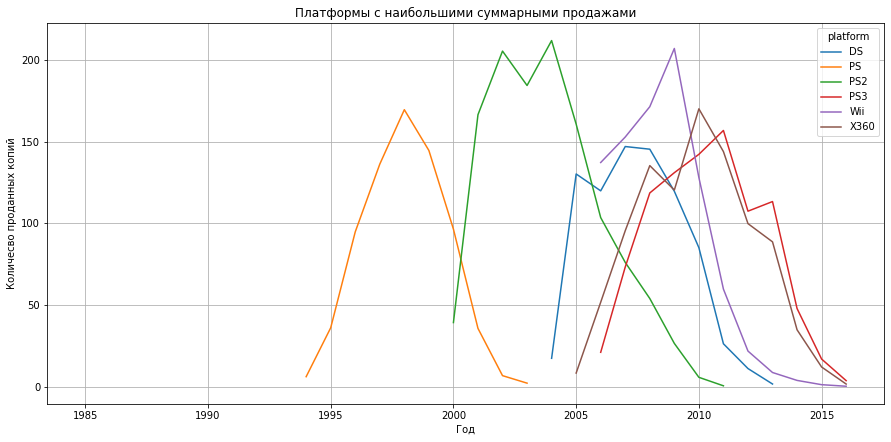

In [30]:
df_st=df
df_q=df_st.query("platform==['PS2','X360','PS3','Wii','PS','DS']")
df_q.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')\
.plot(grid=True, figsize=(15, 7),title='Платформы с наибольшими суммарными продажами')
plt.ylabel('Количесво проданных копий')
plt.xlabel('Год')
plt.show()



Исходя из графика можно увидеть, что за 10 лет почти все платформы по продажам падают. При этом можно заметить, что где-то через 3 года начинается спад продаж

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Отличное определение жизненного цикла продаж у платформ, молодец

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Классный график, наглядный

Подписи осей на графиках и название добавят ясности и читабельности.
Это важные элементы любой визуализации. Как добавить подписи и названия, смотри [здесь](https://pyprog.pro/mpl/mpl_axis_signatures.html) и [там](https://pyprog.pro/mpl/mpl_title.html), и
        
[тут](https://proproprogs.ru/modules/matplotlib-razmeshchaem-standartnye-tekstovye-elementy-na-grafike?ysclid=l6agtioc6f299002507)

In [31]:
df= df.query("2014<=year_of_release<=2015")


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера </b></font>
    <br /> 
    <font size="3", color = "black">
<br />за 2016 год данные неполные, фактически у нас для анализа взят только один полный год — 2015, на рабочих проектах можем упустить фактор сезонности

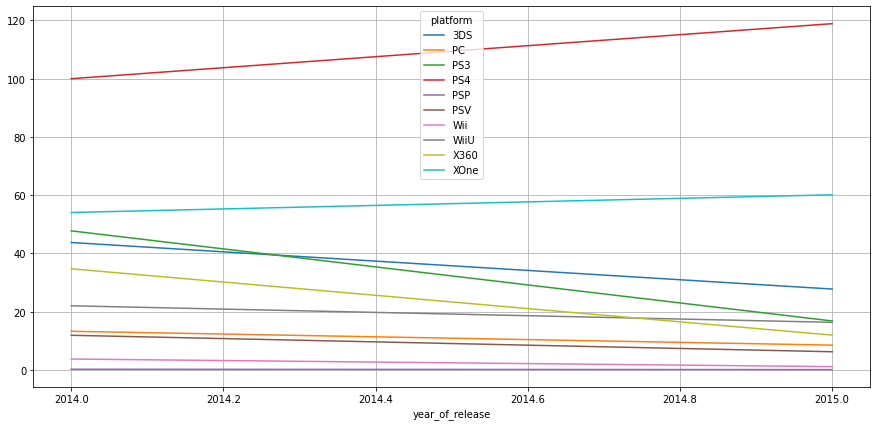

In [32]:
df.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

### Мы взяли для исследования продажи за 2014-2015 года.Исходя из графика видно, что продажи к 2015 году падают.Потенциально прибыльной платформой можно считать PS4, XOne, 3DS, PS,Wiiu .Осальные платформы к 2015 году в продажах сильно проигрывают и многие находяться ближе к нулю.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
После представления общей картины стоит выделить на отдельном графике 5-7 самых важных категорий (платформ) для детального анализа

<div class="alert alert-dang
            er">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />двум платформам из рекомендации уже по 11 лет или около того, их срок активных продаж уже закончен ...
        
        Потенциально прибыльной платформой можно считать PS4, XOne, 3DS, PS3, X360.
        
стоит включить платформу со стабильными продажами PC

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
данные за 2016 год неполные, и делать вывод о падении продаж в 2016 году не стоит, можно сравнивать рост/падение на других промежутках, например 2015 год к 2014 ...

<div class="alert alert-da
            nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит дополнить перечень перспективных платформ

        
даже  на падающих продажах можно заработать, когда объем составляет около 15-20 млн. копий, как например с 3DS
        
30-тилетняя история персональных компьютеров говорит, что игры для PC можно включить в рекомендацию
        


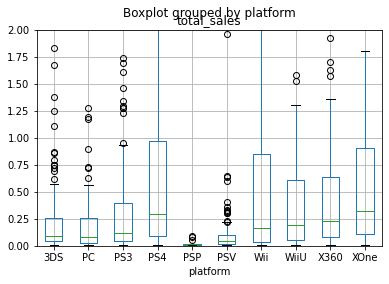

In [33]:
df.boxplot(column='total_sales', by='platform',)
plt.ylim(0,2)
plt.show()

Изучив график за весь период, мы видим также много выбросов.Средние медианные продажи самые высокие у  плАтформ X360, XOne, PS3 и WiiU. Самые низкие медианные продажи у PSV,PSP,PS2.

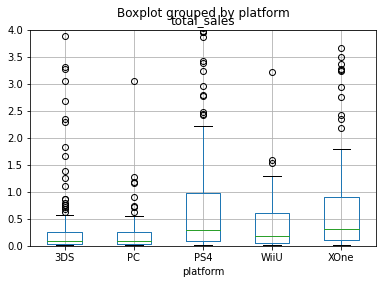

In [34]:
df_games=df.query("platform==['PS4','XOne','3DS', 'PC', 'WiiU']")

df_games.boxplot(column='total_sales', by='platform',)
plt.ylim(0,4)
plt.show()

Изучив график за актуальный период, видно что есть много выбросов частых и резких. Данные игры предлагаю оставить, так как они могли произвести ажиотаж и "выстрелить" в продажах.
Медианные значения продаж примерно у PS4,XOne,WiiU примерно одинаковые. А у PС и 3DS значительно ниже. Самый высокий уровень продаж у PS4 . Самый низкий у 3DS и PS

<div class="alert alert-dan
            ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />

__Не стоит ограничивать перечень платформ из актуального периода для оценки прибыльности платформ__
        
диаграмму размаха перерисовать на актуальной выборке с полным перечнем платформ
        
К сожалению, на этом графике видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов стоит добавить дополнительный график, где будет отображена только нижняя часть boxplot-ов
        
Оба вида важны, т.к. выбросы — это наши звезды, которые приносят максимум выручки
        
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html?highlight=boxplo#pandas.DataFrame.boxplot

# example 1

### example 2

### Исследовательский анализ

##### example 4

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
стоит выделять разделы проекта заголовками разного уровня, за уровень отвечает количество знаков #
    
        # example 1

        #### example 3

        ##### example 4
    
    

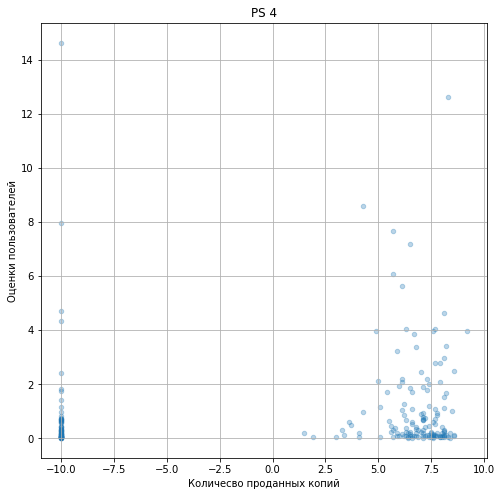

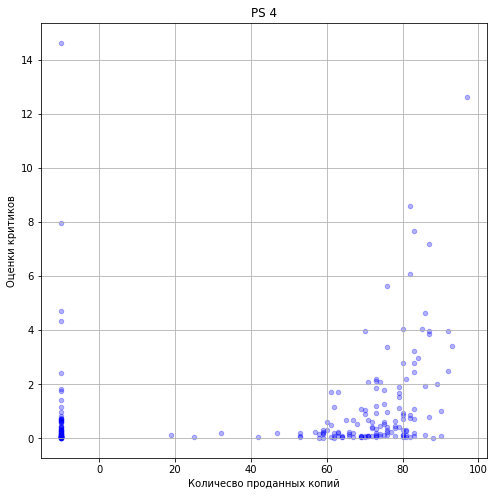

In [35]:
df_games[df_games['platform']=='PS4'].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3,\
                                           figsize=(8,8), grid=True)
plt.title('PS 4')
plt.ylabel('Оценки пользователей')
plt.xlabel('Количесво проданных копий')

plt.show()
df_games[df_games['platform']=='PS4'].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3,\
                                           figsize=(8,8), grid=True, color='blue')
plt.title('PS 4')
plt.ylabel('Оценки критиков')
plt.xlabel('Количесво проданных копий')
plt.show()


In [36]:
df_g=df_games[df_games['platform']=='PS4']
df_g_corr=df_g['user_score'].corr(df_g['total_sales'])
print('Корреляция пользователей для PS4',df_g_corr)
df_g=df_games[df_games['platform']=='PS4']
df_g_corr=df_g['critic_score'].corr(df_g['total_sales'])
print('Кореляцция критиков для PS4 ',df_g_corr)

Корреляция пользователей для PS4 0.08527177946799537
Кореляцция критиков для PS4  0.17387477560994305


<div class="alert alert-dang
            er">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Код не работает
        
        # df_g_mar_corr=df_g_mar['user_score'].corr(df_g_mar['total_sales'])
        # print('Кореляцция критиков для PS4 ',df_g_mar_corr)

теперь посчитаем корреляцию без маркера=-10

In [37]:
df_g=df_games[df_games['platform']=='PS4']
df_g_mar=df_g[df_g['user_score']!=-10]
df_g_mar_corr=df_g_mar['user_score'].corr(df_g_mar['total_sales'])
print('Корелляция пользователей для PS4',df_g_mar_corr)
df_g=df_games[df_games['platform']=='PS4']
df_g_m=df_g[df_g['critic_score']!=-10]
df_g_m_corr=df_g_mar['critic_score'].corr(df_g_m['total_sales'])
print('Корреляция критиков для PS4',df_g_m_corr)

Корелляция пользователей для PS4 0.005328260777115949
Корреляция критиков для PS4 0.42781706672418846


Корелляция слабая. Таким образом оценки пользователей не влияют на продажи.

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Для красоты («продаваемости») всего проекта не стоит выходить за видимую ширину тетради юпитер ноутбука, коллеги ценят удобство прочтения кода. Широкие строки кода рекомендуется — делить <a href="https://qastack.ru/programming/53162/how-can-i-do-a-line-break-line-continuation-in-python">Перенос длинных строк кода</a>. 
    
</div>

Коррелляция между отзывами пользователей и количесво проданных копий XOne : -0.056545980194161016
Корелляция между отзывам и критиков и количесво проданных копийXOne:0.3950752406027547
Коррелляция между отзывами пользователей и количесво проданных копий 3DS : 0.23461041305360802
Корелляция между отзывам и критиков и количесво проданных копий3DS:0.19254976492891213
Коррелляция между отзывами пользователей и количесво проданных копий WiiU : 0.4316948771718133
Корелляция между отзывам и критиков и количесво проданных копийWiiU:0.33773468878153134
Коррелляция между отзывами пользователей и количесво проданных копий PC : -0.11991644726508223
Корелляция между отзывам и критиков и количесво проданных копийPC:0.2076409826949268


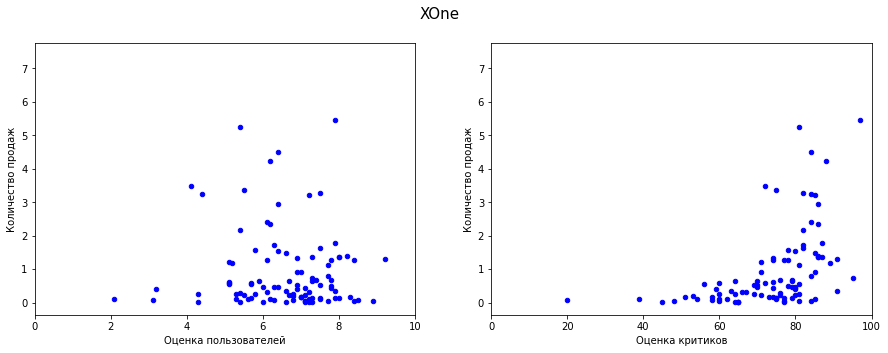

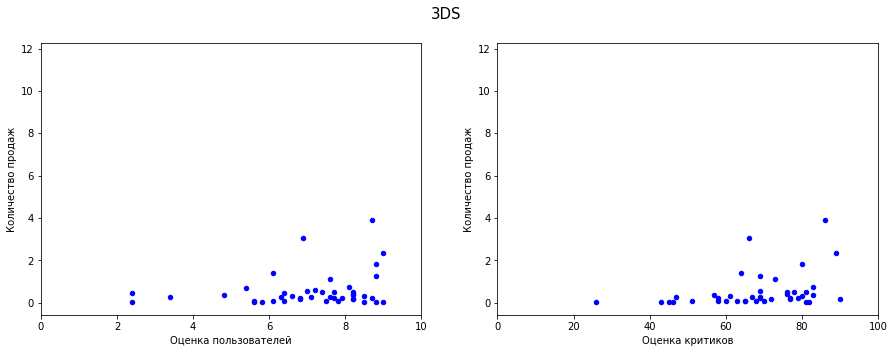

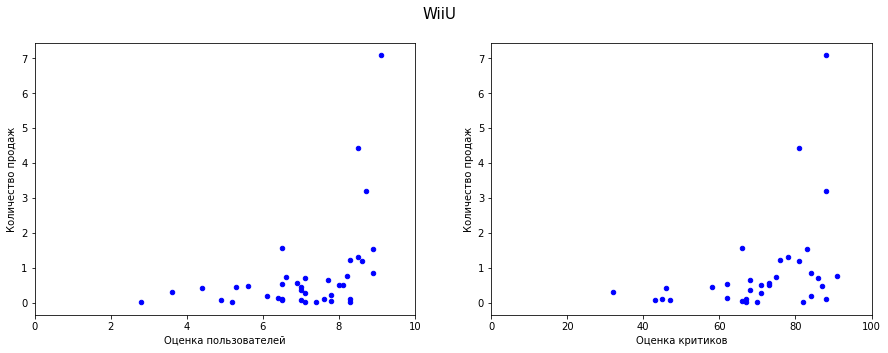

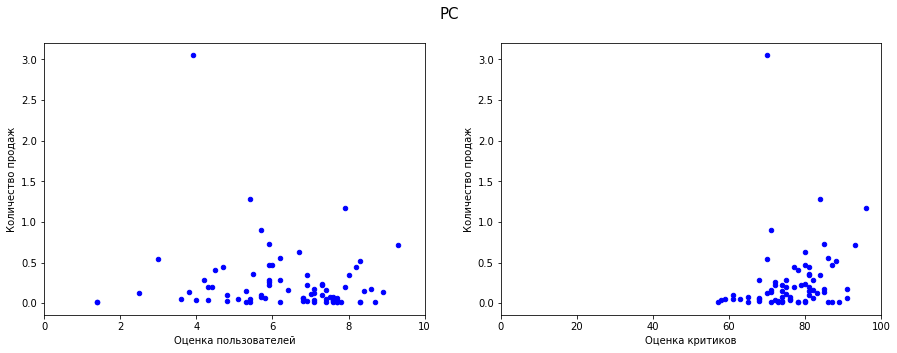

In [38]:
list_of_top5=['XOne','3DS', 'WiiU', 'PC']
for i in list_of_top5:
    platforms = df_games[df_games['platform']==i]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    platforms.plot(kind='scatter',x='user_score', y='total_sales', ax=ax[0],color='blue')
    platforms.plot(kind='scatter',x='critic_score', y='total_sales',ax=ax[1],color='blue')
    fig.suptitle(i, fontsize=15)
    ax[0].set(xlim=(0,10),xlabel='Оценка пользователей')
    ax[1].set(xlim=(0,100),xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    platforms= platforms[ platforms['user_score']!=-10]
    platforms= platforms[ platforms['user_score']!=-10]
    correl = platforms['user_score'].corr(platforms['total_sales'])
    critic_correl = platforms['critic_score'].corr(platforms['total_sales'])
    print(f"Коррелляция между отзывами пользователей и количесво проданных копий {i} : {correl}")
    print(f"Корелляция между отзывам и критиков и количесво проданных копий{i}:{critic_correl}")
    
    
    
         

  


У платформ PS4,WiiU,3DS, PC, XOne зависимость между оценкой пользователя и продажей отсутсвует.У платформ PS4,WiiU,3DS, PC  наблюдается пусть и не сильная, но всё же, связь между оценками критиков и продажами.Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей


<div class="alert alert-dan
            ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит рассмотреть в этом разделе отдельно еще две-три платформы
        
+ Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
+ Соотнесите выводы с продажами игр на других платформах.

<div class="alert alert-da
            nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Отлично, ты используешь диаграмму размаха для определения успешности платформ, молодец
        
Стоит ограничить перечень платформ актуальным периодом
        
Шаг 3. Проведите исследовательский анализ данных
        
+ Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
+ Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

        
+ Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
+ Не учитывайте в работе данные за предыдущие годы.
+ Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
+ Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
        
        
+ Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
+ Соотнесите выводы с продажами игр на других платформах.
        
        
+ Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [39]:
df_genre= df_games.pivot_table(index='genre', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
df_genre



,genre,total_sales
0,Action,133.32
1,Shooter,106.31
2,Role-Playing,69.44
3,Sports,55.76
4,Racing,21.99
5,Misc,21.05
6,Fighting,19.78
7,Platform,13.93
8,Simulation,10.40
9,Adventure,8.06


<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4"><b>⚠️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Для красоты («продаваемости») всего проекта не стоит выходить за видимую ширину тетради юпитер ноутбука, коллеги ценят удобство прочтения кода. Широкие строки кода рекомендуется — делить <a href="https://qastack.ru/programming/53162/how-can-i-do-a-line-break-line-continuation-in-python">Перенос длинных строк кода</a>. 
    

        

Text(0, 0.5, 'Количесво проданных копий')

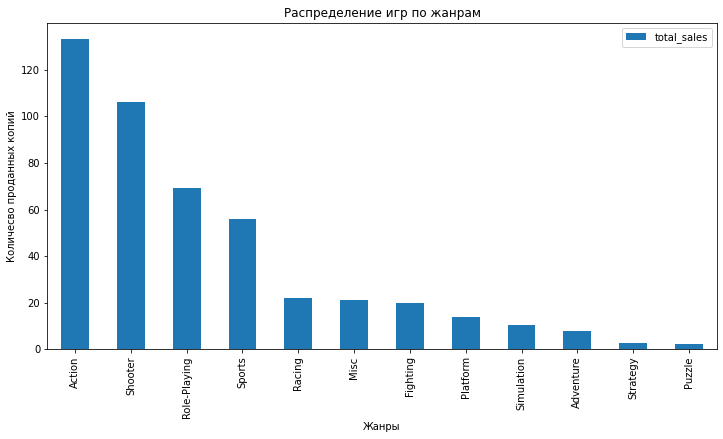

In [40]:
df_genre.plot(kind='bar', x='genre', y='total_sales',figsize=(12,6))
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количесво проданных копий')

Самая популярный и наиболее продоваемый жанр Action. А самый не продоваемый Puzzle. 

<AxesSubplot:title={'center':'total_sales'}, xlabel='genre'>

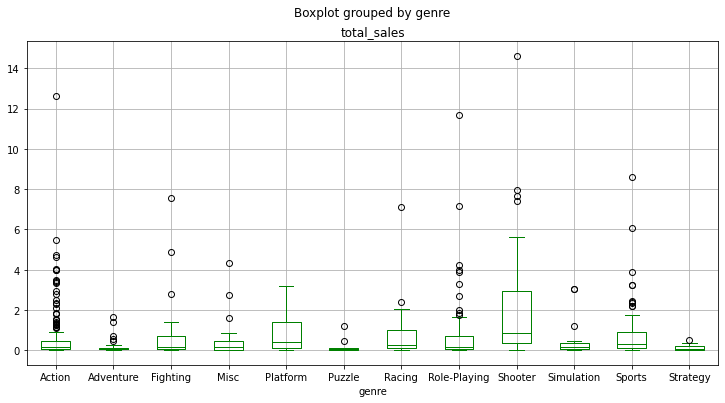

In [41]:
df_games.boxplot(column='total_sales', by='genre',figsize=(12,6),color='green')


(0.0, 2.5)

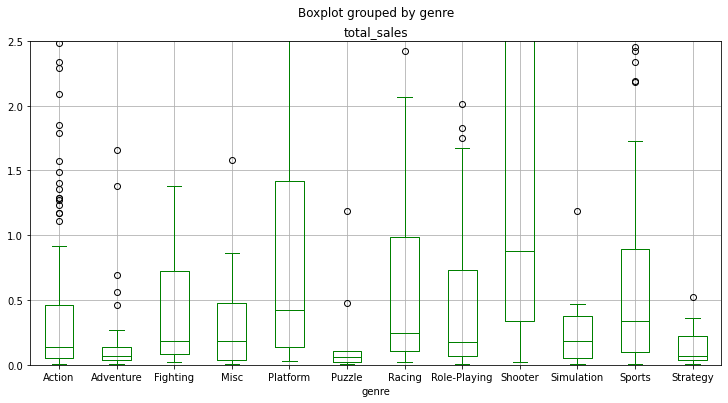

In [42]:
df_games.boxplot(column='total_sales', by='genre',figsize=(12,6),color='green')
plt.ylim(0,2.5)

<div class="alert alert-d
            anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />        
Стоит проанализировать прибыльность жанров на диаграмме размаха, сравнить медианные продажи на каждом жанре и проверить какая из них более стабильна и имеет более длинный ряд успешно продающихся игр
        
График нарисовать __в двух масштабах с выбросами и без__ (чтобы было видно 0.75-квантиль) на актуальной выборке

Самые низкие медианные продажи у Adwenture, Puzzle, Strategy.Самые высокие медианные продажи у Shooter.Самый высокий уровень продаж у Shooter . Самый низкий у Puzzle

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Две диаграммы и многое становиться ясным, какой из жанров наиболее успешен, а у какого выбросы составляют большую часть продаж, молодец

### Составьте портрет пользователя каждого региона.

          na_sales
platform          
X360        595.74
PS2         572.92
Wii         486.87
PS3         390.13
DS          380.31
          eu_sales
platform          
PS2         332.63
PS3         327.21
X360        268.32
Wii         258.32
PS          212.39
          jp_sales
platform          
DS          175.02
PS          139.78
PS2         137.54
SNES        116.55
3DS         100.62
          other_sales
platform             
PS2            190.47
PS3            134.59
X360            84.88
Wii             77.71
DS              59.04
          na_sales
genre             
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
         eu_sales
genre            
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
              jp_sales
genre                 
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
         other_sales
genre 

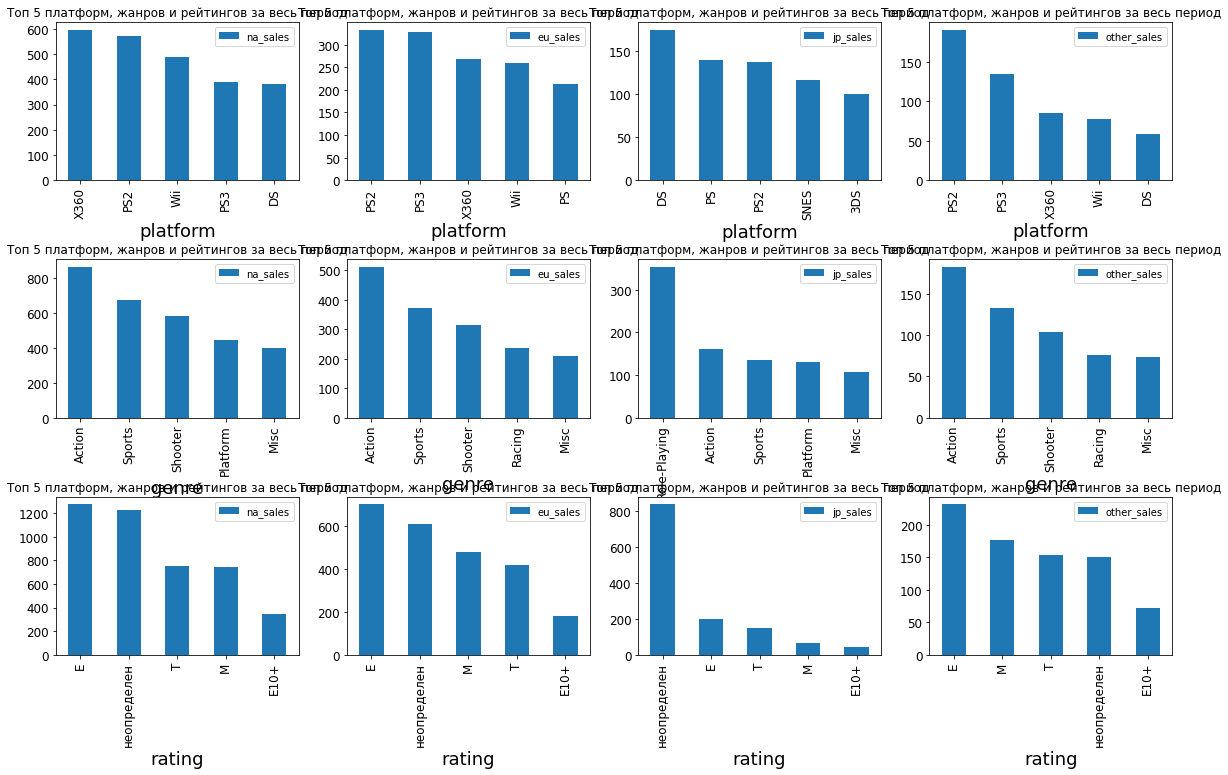

In [43]:
region = ['na_sales','eu_sales','jp_sales', 'other_sales']
parametrs = ['platform','genre','rating']
plt.figure(figsize=(20,16))
plt.subplots_adjust(hspace=0.5)
serial_number = 1
for p in parametrs:
    for r in region:
        ax = plt.subplot(4,4,serial_number)
        plt.xlabel(p ,fontsize=18)
        user_portrait = df_st.groupby(p).agg({r: 'sum'}).sort_values(by=r, ascending=False)[:5]
        print (user_portrait)
        user_portrait.plot(kind='bar', ax=ax, label = p, fontsize=12, title='Топ 5 платформ, жанров и рейтингов за весь период')
        serial_number += 1

Самые популярные игровые платформы в Северной Америке за все время это: XBOX, PS2, WII, PS3, DS.
Топ 5 жанров в Северной Америке за все время: Action, Sports, Shooter,  Music.
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом Е (для всех), на втором месте игры с рейтингом неопределен и на третьем месте игры с рейтингом М( от 17 и старше).
Самые популярные игровые платформы в Европе за все время это: X360, PS2, WII, PS3, DS.
Топ 5 жанров в Европе за все время: Action, Sports, Shooter, platform, Misc.
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом Е (для всех), на втором месте игры с рейтингом неопределен и на третьем месте игры с рейтингом М( от 17 и старше).
Самые популярные игровые платформы в Японии за все время это: DS, PS, PS2, SNES, 3DS.
Топ 5 жанров в Японии за все время: Role-Playning, Action, Sports, Platform, Misc.
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом неопределен, на втором месте игры с рейтингом E(для всех) и на третьем месте игры с рейтингом Т( для подростков,от 13 и старше).
Самые популярные игровые платформы в других странах за все время это:PS2,PS3, X360, Wii,DS.
Топ 5 жанров в Японии за все время: Action, Sports, Shooter, Racing, Misc.
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом Е(для всех), на втором месте игры с рейтингом М(для взрослых, 17+) и на третьем месте игры с рейтингом Т( для подростков,от 13 и старше).

          na_sales
platform          
PS4          77.12
XOne         67.00
3DS          18.50
WiiU         17.26
PC            5.87
          eu_sales
platform          
PS4          98.26
XOne         36.62
PC           14.44
3DS          13.79
WiiU         11.67
          jp_sales
platform          
3DS          36.21
PS4           9.28
WiiU          6.64
XOne          0.31
PC            0.00
          other_sales
platform             
PS4             34.24
XOne            10.28
3DS              3.04
WiiU             2.81
PC               1.49
              na_sales
genre                 
Action           50.87
Shooter          49.76
Sports           24.85
Role-Playing     23.36
Fighting          9.34
              eu_sales
genre                 
Action           52.09
Shooter          40.20
Sports           22.25
Role-Playing     21.31
Racing           11.14
              jp_sales
genre                 
Role-Playing     18.77
Action           14.61
Fighting          3.95
Shooter   

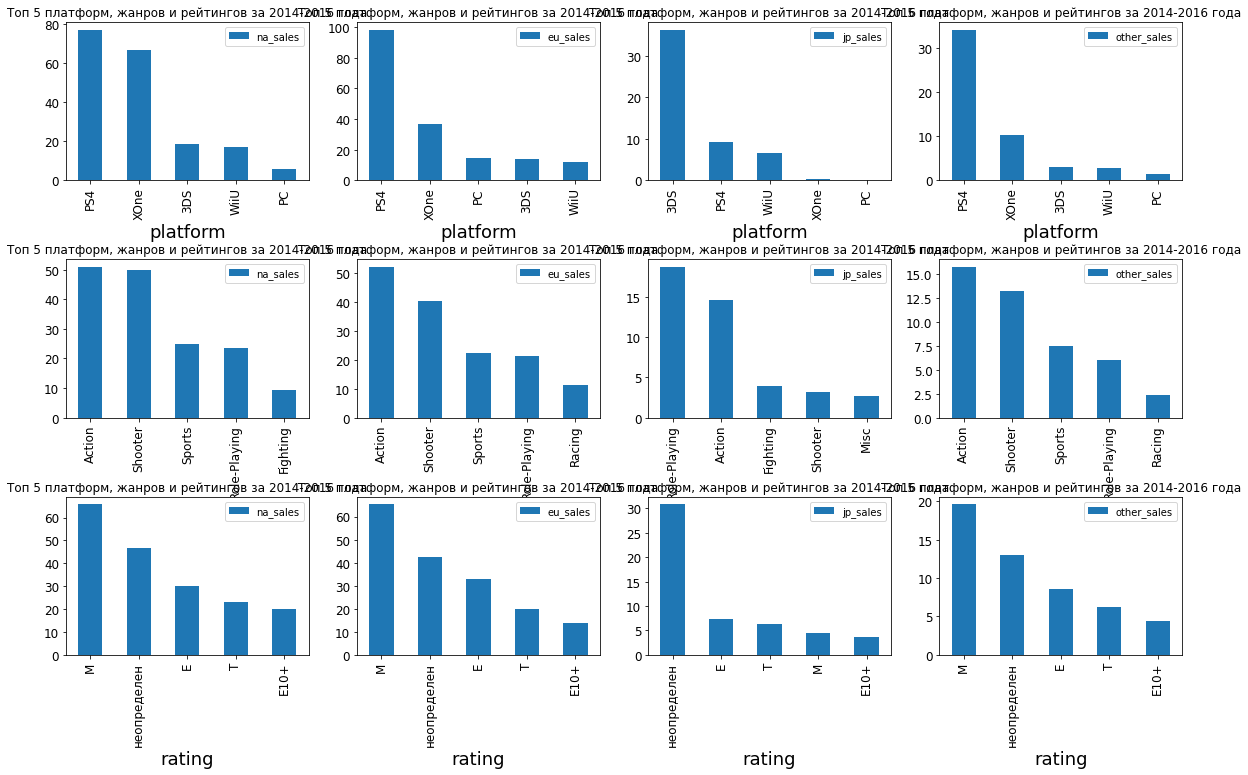

In [44]:
region = ['na_sales','eu_sales','jp_sales','other_sales']
parametrs = ['platform','genre','rating']
plt.figure(figsize=(20,16))
plt.subplots_adjust(hspace=0.5)
serial_number = 1
for p in parametrs:
    for r in region:
        ax = plt.subplot(4,4,serial_number)
        plt.xlabel(p ,fontsize=18)
        user_portrait = df_games.groupby(p).agg({r: 'sum'}).sort_values(by=r, ascending=False)[:5]
        print (user_portrait)
        user_portrait.plot(kind='bar', ax=ax, label = p, fontsize=12, title='Топ 5 платформ, жанров и рейтингов за 2014-2016 года')
        serial_number += 1

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Молодец, справилась

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Извини, запамятовал подсказать
        
Стоит оформить графики раздела TOП-5:

+ для каждого ТОП-5 - перестроить 3 графика рядом с помощью subplots, оптимальнее сравнивать три региона по каждому виду портрета вместе;
+ при анализе платформ и жанров стоит все, что не вошло в ТОП-5, объединять в категорию "другие" - так картина анализа будет более полной
        
        
раз мы написали такиую функцию, думаю не составит труда изменить переменные в двух строчках
        
            for pivot, ax in zip(list(['platform','genre','rating']),axes):
                ppivot = games.pivot_table(index=pivot, values=row, aggfunc='sum'
        
сможешь?

Топ игровых платформ в других странах выглядит таким образом : PS4, 3DS, PS3, XOne, X360
Топ жанров игр: Action, Shooter, Sports, Pole-Playning, Misc.
Топ рейтингов: M(для взрослых),не определен и Е(для всех)

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Заполнение пропусков в рейтинге позволило определить отличия региональных рынков, молодец

###  Проверьте гипотезы.

Для проверки гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC" в качесве нулевой гипотезы и альтернативной были взяты:
H0:Рейтинги платформ Xbox One и PC равны.
H1:Рейтинги платформ Xbox One и PC разные.
Использовала метод равенства средних двух генеральных совокупностей. Так как генеральные  совокупности не зависят друг от друга.


In [45]:
df_games = df_games[df_games['user_score'] != -10]
pc=df_games[df_games['platform']=='PC']
xbox=df_games[df_games['platform']=='XOne']
pc=pc['user_score']
xbox=xbox['user_score']
print('Cреднее PS:',pc.mean())
print('Cреднее XBOX:',xbox.mean())
print('Дисперсия PS:' ,np.var(pc))
print('Дисперсия XBOX:',np.var(xbox))

Cреднее PS: 6.298701298701299
Cреднее XBOX: 6.591919191919192
Дисперсия PS: 2.8289593523359757
Дисперсия XBOX: 1.5799347005407613


In [46]:
alpha=.05
results=st.ttest_ind(xbox,pc,equal_var=False)
print('Значение p-value:',results.pvalue)
if results.pvalue < alpha :
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу')
 

Значение p-value: 0.2064150169331124
Не получилось опровергнуть нулевую гипотезу


Получив p-value равно 21% , у нас не получилось опровергнуть нулевую гипотезу.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Важно удалить пропуски и «заглушки» перед проведением теста, молодец

<div class="alert alert-da
            nger">
<font size="4"><b>❌ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
        
        Значение p-value: 0.2064150169331124
        
Равно 20,64%
        
        Получив p-value равно 2% , у нас не получилось опровергнуть нулевую гипотезу.
        
стоит поправить вывод

<div class="alert alert-dange
            r">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Стоит выравнивать периоды использования платформ, одна из приставок вышла на рынок совсем недавно ...
        
df_st содержит данные за период как минимум с 2006 года, когда одной из приставок не существовало

In [47]:
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88,9.1,E,7.09
...,...,...,...,...,...,...,...,...,...,...,...,...
16510,Art Academy: Home Studio,WiiU,2015,Misc,0.00,0.00,0.01,0.00,82,8.3,E,0.01
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,-10,1.4,E,0.01
16533,Rugby League Live 3,XOne,2015,Action,0.00,0.01,0.00,0.00,-10,7.1,E,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65,6.0,M,0.01


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Гипотезы сформулированы верно, для акцентирования можно использовать в нулевой гипотезе слово равны

Для проверки гипотезы "Средние пользовательские рейтинги жанров Action и Sports " в качесве нулевой гипотезы и альтернативной были взяты:

H0:Рейтинги жанров Action и Sports равны.
H1:Рейтинги жанров Action и Sports разные.
Использовала метод равенства средних двух генеральных совокупностей. Так как генеральные  совокупности не зависят друг от друга.

In [48]:
df_games = df_games[df_games['user_score'] != -10]
action=df_games[df_games['genre']=='Action']
sports=df_games[df_games['genre']=='Sports']
action=action['user_score']
sports=sports['user_score']
print('Cреднее Action:',action.mean())
print('Cреднее Sports:',sports.mean())
print('Дисперсия Action :' ,np.var(action))
print('Дисперсия Sports:',np.var(sports))

Cреднее Action: 6.779577464788733
Cреднее Sports: 5.343636363636363
Дисперсия Action : 1.6692308073794881
Дисперсия Sports: 2.702459504132232


In [49]:
alpha=.05
results=st.ttest_ind(action,sports,equal_var=False)
print('p-значение:',results.pvalue)
if results.pvalue <alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу')

p-значение: 1.3930674954141246e-07
Отвергаем нулевую гипотезу


Получив p-value, отвергаем нулевую гипотезу. Таким образом, вероятности получить одинакове средние рейнтинги по двум жанра практически нет.

<div class="alert alert-d
            anger">
<font size="4"><b>❌ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Число записано в экспоненциональном формате
        
        p-значение: 1.3930674954141246e-07
        
оно стремится к нулю, стоит поправить вывод
        
        Значение p-value равно 13%.

<div class="alert alert-dang
            er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Что означает на языке статистики p-значение: 0.06480928064420527

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в4</b></font>
<br /> 
<font size="3", color = "black">
<br />
Приведу пример и теорию для понимания формулировок и интерпретации итогов проведения гипотез</b>
        
      
Задача. Приведены два датасета: сумма покупок, совершённых за месяц посетителями, привлечёнными по двум разным каналам. В вашем распоряжении случайная выборка из 30 покупок для каждого канала.
        
H0 - средние чеки равны
        
        
H1 - средние чеки НЕ равны

Да сама формулировка нулевой и альтернативной гипотезы звучит именно так, но результат теста интерпретируется другими словами
        

<b>Из теории на тренажере</b>
        
Формулирование двусторонних гипотез. <br>
        
<b>Никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу. Это наше фундаментальное ограничение. </b>Данные могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае нет оснований утверждать, что выдвинутая гипотеза доказана.
Допустим, данные гипотезе не противоречат, тогда мы её не отвергаем. Если же мы приходим к выводу, что получить такие данные в рамках этой гипотезы вряд ли возможно, у нас появляется основание отбросить эту гипотезу.
    
P-значение (англ. P-value) — величина, используемая при тестировании статистических гипотез. <b>Фактически это вероятность ошибки при отклонении нулевой гипотезы (ошибки первого рода)</b> пример ниже

In [50]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера в4</b></font>
<br /> 
<font size="3", color = "black">
<br />
Интерпретация результата:

Полученное значение p-value говорит о том, что хотя средний чек пришедших из разных каналов и неодинаков, <b>с вероятностью в почти 19% такое или большее различие можно получить случайно. </b>Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.
        
А если p-value  будет равно 0,9999, то это значит, что с вероятностью почти 100% <u>такое различие</u> можно получить случайно — то есть почти никогда :)  (но учитываем, что тест проводится на выборке из генеральной совокупности, все может поменяться)


### Общий вывод.





#### Обработка данных:
В ходе исследования мною были выявлены пропуски в данных.В столбцах name, year_of_release, genre пропуски были удалены, так как их процент был маленьким и он маловероятно повлиял на статистику. Пропуски в стобце  rating удалить не получилость, так как там высокий процент и удаления данных значений очень сильно повлияет на достоверность исследования, поэтому мы пропуски заполняем значением "неопределен". Пропуски в столбцах user_score и сritic_score, так же не подлежит удалению из-за большого процента пропусков, который одназначно повлияет на статистику исследования, поэтому мной был установлен маркер=-10.
Также были выялены дубликаты в столбце rating и заменены и приведены в змеиный регистр названия столбцов и изменены типы данных в следующих столбцах:year_of_release и user_score.
Также в ходе исследования мною был создан в таблице новый столбец суммарных продаж во всех регионах.
#### Исследовательский анализ:
В результате исследовательского анализа намы были выявлены платформы с наибольшими суммарными продажами:PS2,X360,PS3,Wii,PS,DS.
А также выявлена статистика продаж по жанрам игр. Самым прибыльным жанров является Action,Shooter а самым не прибыльным Puzzly.  

Мы взяли для исследования актуального периода продажи за 2014-2016 года.На основании исследования можно сказать, что продажи к 2016 году падают.Потенциально прибыльной платформой можно считать PS4, XOne,WiiU,PC, 3DS .Осальные платформы к 2016 году в продажах сильно проигрывают и многие находяться по продажам  ближе к нулю.
Изучив график за актуальный период, видно что есть много выбросов частых и резких. Данные игры предлагаю оставить, так как они могли произвести ажиотаж и "выстрелить" в продажах.
Медианные значения продаж примерно у PS4,XOne,Wiiu примерно одинаковые. А у PS3 и 3DS значительно ниже. Самый высокий уровень продаж у PS4 И XOne. Самый низкий у 3DS.
Далее в исследовании у платформ PS4,WiiU,3DS, PC, XOne зависимость между оценкой пользователя и продажей отсутсвует об этом свидетельсвует низкий уровень кррреляции.У платформ PS4,WiiU,3DS, PC  наблюдается пусть и не сильная, но всё же, связь между оценками критиков и продажами.Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей
#### Составлени портрета пользователя
В результате исследования мною были составлены портерт пользователя в Северной Америке, Европе, Японии и других странах, как за весь период, так и за актульный период.
Портрет пользователя в Северной Америке:
- Самые популярные игровые платформы в Северной Америке за актуальный период: PS4,XOne,WiiU,PC,PS3.
- Топ 5 жанров за актуальный период:Shooter, Action, Sports, Role-Playing, Fighting.
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом М (для взрослых), на втором месте игры с рейтингом неопределен и на третьем месте игры с рейтингом E( для всех).
Портрет пользователя в Европе:
- За актуальный период 2014-2016 год самыми популярными платформами являются PS4,XOne,WiiU,PC,PS3.
- Самые популярные жанры: Action,Shooter, Sports,Role-Playning,Racing.
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом М(для взрослых,с 17 лет и старше), на втором месте игры с рейтингом неопределен и на третьем месте игры с рейтингом E(для всех).
Портрет пользователя в Японии за актуальный период:
- Топ игровых платформ выглядит таким образом : PS4,XOne,WiiU,PC,PS3
- Топ жанров игр: Action, Role-Playing, Fighting, Shooter, Misc.
- Топ рейтингов: не определен, T(для подростков, старше 13 лет) и М(для взрослых, старше 17 лет)
Портрет пользователя других стран:
- Топ игровых платформ в других странах выглядит таким образом : PS4,XOne,WiiU,PC,PS3
- Топ жанров игр: Action, Shooter, Sports, Pole-Playning, Misc.
- Топ рейтингов: M(для взрослых),не определен и Е(для всех).
Проверили две гипотезы:
1 гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.
2 гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.
В результате исследования: 
1 гипотеза не удалось опровергнута.
2 гипотеза опровергнута.
Рекомендация: На 2017 год строя прогноз можно оринтировться на платформу PS4 и XOne жанры игр:Shooter, Action и на рейтинг E и M.


<div class="alert alert-dan
            ger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Платформам "X360" и "PS3" уже исполнилось 11 лет и они  с малой вероятностью станут перспективными в 2017 году
        
Стоит поправить итоговый вывод
        
        За актуальный период 2014-2016 год самыми популярными платформами являются PS4,XOne,PS3,3DS,X360.

<div class="alert alert-da
            nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Итоговый вывод технически составлен грамотно
        
стоит перепроверить результаты после исправления всех комментариев

<div class="alert alert-success">
<font size="5", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
Ты выполнила практически все пункты проекта, молодец! Проведен значительный объем исследования 
        
Критические ❌ комментарии связаны с неточностями: 

 + добавить название
 + изменить тип данных
 + сократить категории в рейтингах ESRB — на твое усмотрение
 + переопределить перечень перспективных платформ
 + исправить диаграмму размаха для анализа продаж на актуальных платформах
 + добавить исследование зависимости по платформам конкурентам (от оценок критиков и пользователей)        
 + оценить прибыльность жанров на диаграмме размаха
 + перестроить графики в ТОП-5 
 + в разделе проверки гипотез подправить выборки плюс можно более подробно расшифровать значение p_value 
 + перепроверить промежуточные и итоговый выводы после всех исправлений

Стоит обратить внимание на ⚠️ комментарии...        
        
Если будут вопросы про мои комментарии - задавай, если какой-то формат взаимодействия не устраивает или есть какие-то другие пожелания - пиши :)

<div class="alert alert-success">
    <font size="5", color= "seagreen"><b>Жду твой проект и твои комментарии 🤝</b></font><br />

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
Может пригодиться  
    
[Подборка статей о работе с библиотеками для анализа данных на языке Python](https://dfedorov.spb.ru/pandas/)
    
   
[Визуализация](https://dfedorov.spb.ru/pandas/%D0%AD%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B5%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20Matplotlib.html)


[Искусство статистики](https://www.mann-ivanov-ferber.ru/books/iskusstvo-statistiki/)
        
[Постер «Графики, которые убеждают всех»](https://www.notion.so/6c5ae8ceb8b5411e907c93c9b5e6a44e)        
        
        
В помощь — как реализовать интерактивный план проекта вручную (для собственных проектов), смотри по <a href="https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704">ссылке</a>
    
пара ссылок и по разделам проекта можно будет переходить без пролистывания всего кода, особенно актуально на проектах длина которых >  10 страниц (и там где не установлен плагин TOC)      

### Бонус

In [51]:
data_games = pd.read_csv('/datasets/games.csv')

In [52]:
data_games.columns = map(str.lower, data_games.columns)

In [53]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [54]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [55]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [56]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [57]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

/tmp/ipykernel_1190/4242612406.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
/tmp/ipykernel_1190/4242612406.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
/tmp/ipykernel_1190/4242612406.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()


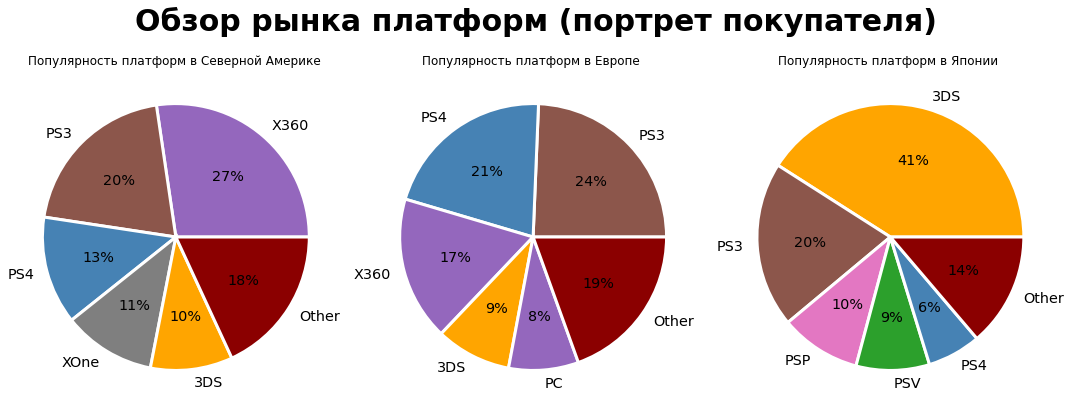

In [58]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2011

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

/tmp/ipykernel_1190/4242612406.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
/tmp/ipykernel_1190/4242612406.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
/tmp/ipykernel_1190/4242612406.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()


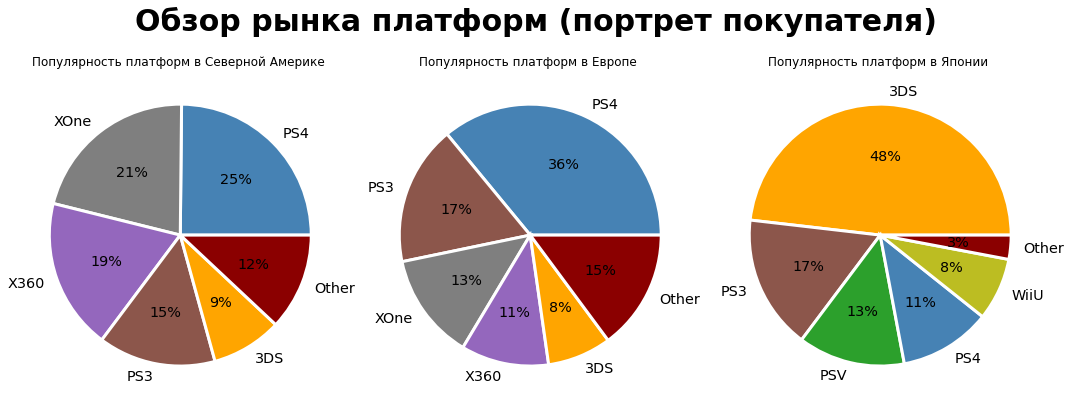

In [59]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2013

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

/tmp/ipykernel_1190/4242612406.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
/tmp/ipykernel_1190/4242612406.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
/tmp/ipykernel_1190/4242612406.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()


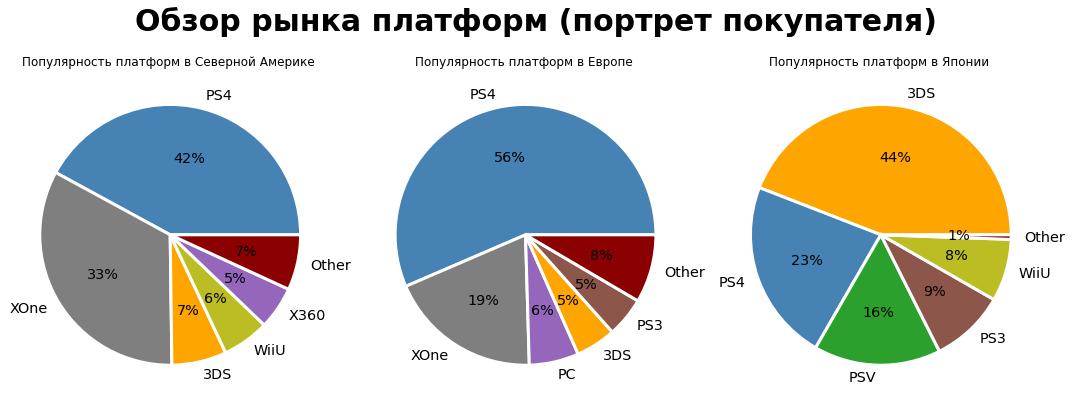

In [60]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2015

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в4</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 2015 год взят для акцентирования на изменении доли в продажах современных платформ